# Project Title: 
Telecommunications Customer Churn Prediction Analysis

# Business Understanding

## 1. Introduction
This project aims to assist a telecom company in understanding their data and predicting customer churn. The company has provided access to three different datasets: the first dataset with 3000 records stored in a remote Microsoft SQL Server database, the second dataset with 2000 records stored on OneDrive, and the third dataset hosted on a GitHub repository.

### 1.1. Objectives
Understand the data: Our first objective is to provide insights into the telecom company's data, including customer demographics, services availed, and payment details. This understanding will enable the company to make informed business decisions.

Find the lifetime value of each customer: By analyzing the data, we aim to identify factors that influence the rate at which customers churn. Understanding customer behavior and identifying key predictors will help the telecom company estimate the lifetime value of each customer.

Predict customer churn: The primary objective is to develop a predictive model that accurately determines whether a customer is likely to churn or not. We will employ machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to build a model that effectively predicts customer churn.

### 1.2. Methodology
To achieve our objectives, we will follow the CRISP-DM framework, which consists of the following steps:

Data exploration: We will thoroughly explore the datasets to gain insights into the available variables, their distributions, and relationships. This step will provide us with an initial understanding of the data and help identify any data quality issues.

Missing value computations: We will identify missing values in the datasets and decide on an appropriate strategy for handling them. This may involve imputing missing values or removing data points with missing values.

Feature engineering: We will perform feature engineering to transform and create new variables that can potentially improve the predictive power of our models. This step may include encoding categorical variables, scaling numerical variables, or creating interaction terms.

Model development: We will utilize various machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to develop predictive models for customer churn. We will train the models on a subset of the data and evaluate their performance using appropriate metrics.

Model evaluation and interpretation: We will evaluate the trained models using evaluation metrics such as accuracy, precision, recall, and F1-score. Additionally, we will interpret the models to understand the factors driving customer churn and their relative importance.

Model optimization and hyperparameter tuning: We will fine-tune the models by optimizing their hyperparameters to improve their performance. This step may involve techniques like grid search or random search to find the optimal combination of hyperparameters.

By following this methodology, we aim to provide valuable insights to the telecom company and develop a reliable predictive model for customer churn.

# Load Datasets

## Installations

In [1]:
# %pip install pyodbc
# %pip install openpyxl
# %pip install ydata-profiling

## Load first dataset from SQL database

In [2]:
# Import necessary libraries
import pyodbc
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Establish a connection
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'

# Create the connection string using the ODBC driver format
conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Establish the connection using the connection string
conn = pyodbc.connect(conn_str)

In [4]:
# Query the database to retrieve the data
query = 'SELECT TOP 3000 * FROM LP2_Telco_churn_first_3000'
df_db = pd.read_sql(query, conn)

In [5]:
# Close connection
conn.close()

In [6]:
# Display the dataframe
df_db.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


## Load second dataset (excelfile)

In [7]:
# Read the excel file into a pandas dataframe
df_excel = pd.read_excel('Telco-churn-second-2000.xlsx')

# Display the dataframe
df_excel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


## Load third dataset (csv file)

In [8]:
# Read third dataset
df_csv = pd.read_csv('LP2_Telco-churn-last-2000.csv')

# Display the dataframe
df_csv.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


## Organize the Datasets into Train and Test

### Train Dataset

In [9]:
# Train data is the 1st Dataset from the SQL Server and the 3rd Dataset from the CSV file.
# Concat the two files into 1 dataset
train_df = pd.concat([df_db, df_csv], axis=0, ignore_index=True)
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [10]:
# Save the train dataset in a new csv file to be used in PowerBI
train_df.to_csv('Train_Data.csv', index=False)
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


### Test Dataset

In [11]:
# The Test dataset is the 2nd Dataset from the Excel File 
test_df = df_excel

# Questions and Hypothesis

## Hypothesis

H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their 
demographics, services, and payment methods.

H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

## Questions
1. Is there a relationship between the monthly charges and the likelihood of churn?
2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?
3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?
4. How does the churn rate vary based on the customers' gender?
5. Does the presence of a partner influence the likelihood of churn?
6. Is there a correlation between the tenure of customers and their churn rate?

# Data Exploration

### Explore The Train and Test Datasets

#### a. Column Information of The Datasets

In [12]:
# Train Dataset Column information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
# Test Dataset Column information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [14]:
train_df.infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [15]:
test_df.infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


#### b. Pandas Profiling of The Datasets

In [85]:
# # For train_df
# train_profile = ProfileReport(train_df, title="Train Dataset Profile Report", explorative=True)
# train_profile.to_file("train_report.html")

# # For test_df
# test_profile = ProfileReport(test_df, title="Test Dataset Profile Report", explorative=True)
# test_profile.to_file("test_report.html")

#### c. The Shape of The Datasets

In [17]:
# Check the shape of the train dataframe
train_df.shape

(5043, 21)

In [18]:
# Check the shape of the test dataframe
test_df.shape

(2000, 20)

#### d. The Unique Values of The Datasets

In [19]:
# check unique values of each column
for column in train_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, train_df[column].unique()))
    print('==='*15)

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [False True]
Column: Partner - Unique Values: [True False 'No' 'Yes']
Column: Dependents - Unique Values: [False True 'No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: [False True 'Yes' 'No']
Column: MultipleLines - Unique Values: [None False True 'No' 'No phone service' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: [True False None 'No' 'Yes' 'No internet service']
Column:

In [20]:
# check unique values of each column
for column in test_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, test_df[column].unique()))
    print('==='*15)

Column: customerID - Unique Values: ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
Column: gender - Unique Values: ['Male' 'Female']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['No' 'Yes']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
Column: PhoneService - Unique Values: ['Yes' 'No']
Column: MultipleLines - Unique Values: ['Yes' 'No' 'No phone service']
Column: InternetService - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: OnlineSecurity - Unique Values: ['No' 'No internet service' 'Yes']
Column: OnlineBackup - Unique Values: ['No' 'No internet service' 'Yes']
Column: DeviceProtection - Unique Values: ['No' 'No internet service' 'Yes']
Column: TechSuppor

#### e. The Summary Statistics of Numerical Columns of The Datasets

In [21]:
# Summary statistics of train_db to get insights into the distribution and basic characteristics of the numerical variables
train_df.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


In [22]:
# Summary statistics of test_df to get insights into the distribution and basic characteristics of the numerical variables
test_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325
std,0.368084,24.632677,30.136858
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,34.250000
50%,0.000000,27.000000,69.800000
75%,0.000000,55.000000,89.275000
max,1.000000,72.000000,118.750000


#### f. Checking for Missing Values in The Datasets

In [23]:
# Checking for missing values
train_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [24]:
# Calculating the percentage of missing values in each column
missing_percent = train_df.isnull().sum() / len(train_df) * 100

# Displaying the percentage of missing values
print("Percentage of missing values:")
for column, percent in missing_percent.items():
    print(f"{column}: {percent:.2f}%")

Percentage of missing values:
customerID: 0.00%
gender: 0.00%
SeniorCitizen: 0.00%
Partner: 0.00%
Dependents: 0.00%
tenure: 0.00%
PhoneService: 0.00%
MultipleLines: 5.33%
InternetService: 0.00%
OnlineSecurity: 12.91%
OnlineBackup: 12.91%
DeviceProtection: 12.91%
TechSupport: 12.91%
StreamingTV: 12.91%
StreamingMovies: 12.91%
Contract: 0.00%
PaperlessBilling: 0.00%
PaymentMethod: 0.00%
MonthlyCharges: 0.00%
TotalCharges: 0.10%
Churn: 0.02%


The majority of columns have very low percentages of missing values, indicating relatively complete data.
The 'TotalCharges' column has a slightly higher percentage of missing values, suggesting the need for imputation using mean or median values.
Categorical columns such as 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', etc., have a higher percentage of missing values, indicating a significant number of instances lacking information. Replacing missing values with a new category retains the missingness information during analysis.

In [25]:
# Checkng for missing values in the test dataset
test_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

The test dataset has no missing values

#### g. Checking for Duplicate Values of The Datasets

In [26]:
# Checking for duplicates in train_df
train_duplicates = train_df.duplicated().sum()
train_duplicates

0

In [27]:
# Checking for duplicates in test_df
test_duplicates = test_df.duplicated().sum()
test_duplicates

0

# Data Cleaning

In [28]:
# Handling the issues we identified earlier during data exploration

## a. Dropping Unwanted Columns

In [29]:
#The customerID column has no use in explaining whether or not the customer will churn.
# drop the customerID column from the train dataset
train_df.drop(columns='customerID', inplace=True)
train_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
# drop the customerID column from the train dataset
test_df.drop(columns='customerID', inplace=True)
test_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

## b. Data Transformation

### i. Standardizing the Columns

In [31]:
# Standardize 'SeniorCitizen' column
train_df['SeniorCitizen'] = train_df['SeniorCitizen'].replace({False: 0, True: 1}).astype(int)

# Standardize 'Partner' and 'Dependents' columns
train_df['Partner'] = train_df['Partner'].replace({False: 'No', True: 'Yes'})
train_df['Dependents'] = train_df['Dependents'].replace({False: 'No', True: 'Yes'})

# Standardize 'PhoneService' column
train_df['PhoneService'] = train_df['PhoneService'].replace({False: 'No', True: 'Yes'})

# Standardize 'MultipleLines' column
train_df['MultipleLines'] = train_df['MultipleLines'].replace({False: 'No', True: 'Yes', 'No phone service': 'No', None: 'No'})
test_df['MultipleLines'] = test_df['MultipleLines'].replace({False: 'No', True: 'Yes', 'No phone service': 'No', None: 'No'})

# Standardize 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' columns
# Train dataset
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].replace({False: 'No', True: 'Yes', None: 'No'})
train_df['OnlineBackup'] = train_df['OnlineBackup'].replace({False: 'No', True: 'Yes', None: 'No'})
train_df['DeviceProtection'] = train_df['DeviceProtection'].replace({False: 'No', True: 'Yes', None: 'No'})
train_df['TechSupport'] = train_df['TechSupport'].replace({False: 'No', True: 'Yes', None: 'No'})
train_df['StreamingTV'] = train_df['StreamingTV'].replace({False: 'No', True: 'Yes', None: 'No'})
train_df['StreamingMovies'] = train_df['StreamingMovies'].replace({False: 'No', True: 'Yes', None: 'No'})

# Test dataset
test_df['OnlineSecurity'] = test_df['OnlineSecurity'].replace({False: 'No', True: 'Yes', None: 'No'})
test_df['OnlineBackup'] = test_df['OnlineBackup'].replace({False: 'No', True: 'Yes', None: 'No'})
test_df['DeviceProtection'] = test_df['DeviceProtection'].replace({False: 'No', True: 'Yes', None: 'No'})
test_df['TechSupport'] = test_df['TechSupport'].replace({False: 'No', True: 'Yes', None: 'No'})
test_df['StreamingTV'] = test_df['StreamingTV'].replace({False: 'No', True: 'Yes', None: 'No'})
test_df['StreamingMovies'] = test_df['StreamingMovies'].replace({False: 'No', True: 'Yes', None: 'No'})

# Standardize 'PaperlessBilling' column
train_df['PaperlessBilling'] = train_df['PaperlessBilling'].replace({False: 'No', True: 'Yes'})

# Standardize 'Churn' column
train_df['Churn'] = train_df['Churn'].replace({'No': False, None: False, 'Yes': True})

In [32]:
# Check unique values of each column
for column in train_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, train_df[column].unique()))
    print('==='*15)

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet service']
Column: Stream

In [33]:
# Check unique values of each column
for column in test_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, test_df[column].unique()))
    print('==='*15)

Column: gender - Unique Values: ['Male' 'Female']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['No' 'Yes']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
Column: PhoneService - Unique Values: ['Yes' 'No']
Column: MultipleLines - Unique Values: ['Yes' 'No']
Column: InternetService - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: OnlineSecurity - Unique Values: ['No' 'No internet service' 'Yes']
Column: OnlineBackup - Unique Values: ['No' 'No internet service' 'Yes']
Column: DeviceProtection - Unique Values: ['No' 'No internet service' 'Yes']
Column: TechSupport - Unique Values: ['No' 'No internet service' 'Yes']
Column: StreamingTV - Unique Values: ['Yes' 'No internet service' 'No']
Column: Stream

### i. Removing 'automatic' from Payment Method names

In [34]:
# Remove 'automatic' from payment method names in the train dataset
train_df['PaymentMethod'] = train_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# Unique elements of the 'PaymentMethod' column after the modification 
train_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [35]:
# Remove 'automatic' from payment method names in the test dataset
test_df['PaymentMethod'] = test_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# Unique elements of the 'PaymentMethod' column after the modification 
test_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'],
      dtype=object)

### ii. Transforming the 'TotalCharges' column into a numeric data type

In [36]:
# Transform the 'TotalCharges' column in the train dataset into a numeric data type
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

#confirm the datatype
train_df['TotalCharges'].dtype

dtype('float64')

In [37]:
# Check for null values the column
train_df['TotalCharges'].isnull().sum()

8

In [38]:
# Null observations of the column
train_df[train_df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.549999,NaN,False
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.250000,NaN,False
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,False
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.750000,NaN,False
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.049999,NaN,False
3218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,False
4670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,False
4754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer,61.900000,NaN,False


In [39]:
# Transform the 'TotalCharges' column in the test dataset into a numeric data type
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

#confirm the datatype
test_df['TotalCharges'].dtype

dtype('float64')

In [40]:
# Check for null values the  column
test_df['TotalCharges'].isnull().sum()

3

In [41]:
# Null observations of the column
test_df[test_df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
1380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN


The 'TotalCharges' column in both the train and test datasets has been transformed into a numeric data type (float64) using the pd.to_numeric() function. 

The train dataset has 8 null values, while the test dataset has 3 null values in the 'TotalCharges' column.

The null observations in each dataset also have a tenure of 0 even though MontlyCharges is not null for these entries. This information appears to be contradictory so these observations should be dropped from the dataset

In [42]:
# Drop observations with null values in 'TotalCharges' column from train dataset
train_df = train_df.dropna(subset=['TotalCharges'])

In [43]:
# Drop observations with null values in 'TotalCharges' column from test dataset
test_df = test_df.dropna(subset=['TotalCharges'])

# Bivariate Analysis

## 1. Monthly Charges vs. Churn

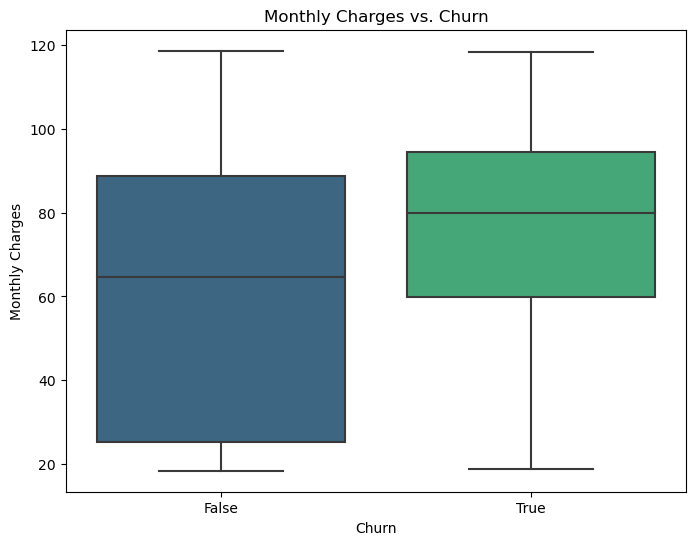

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_df, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

There is a slight difference in monthly charges between churned and non-churned customers. Churned customers tend to have higher monthly charges compared to non-churned customers.

## 2. Churn Distribution by Internet Service Type

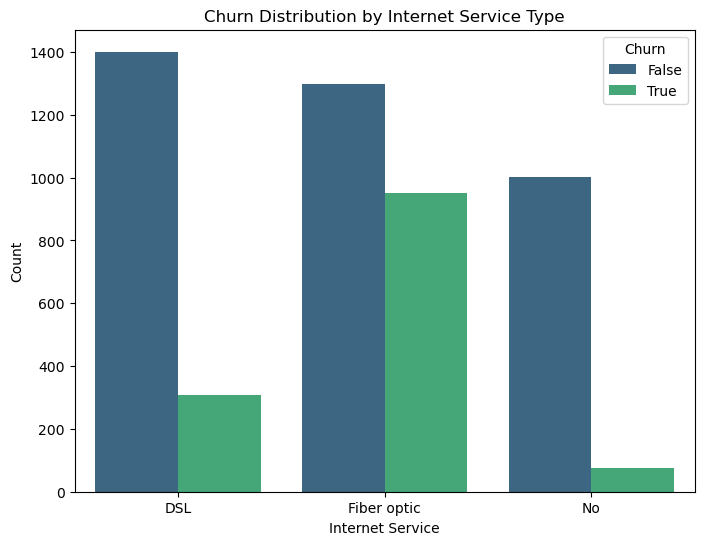

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Distribution by Internet Service Type')
plt.legend(title='Churn', loc='upper right')
plt.show()

Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service.

## 3. Churn Distribution by Gender

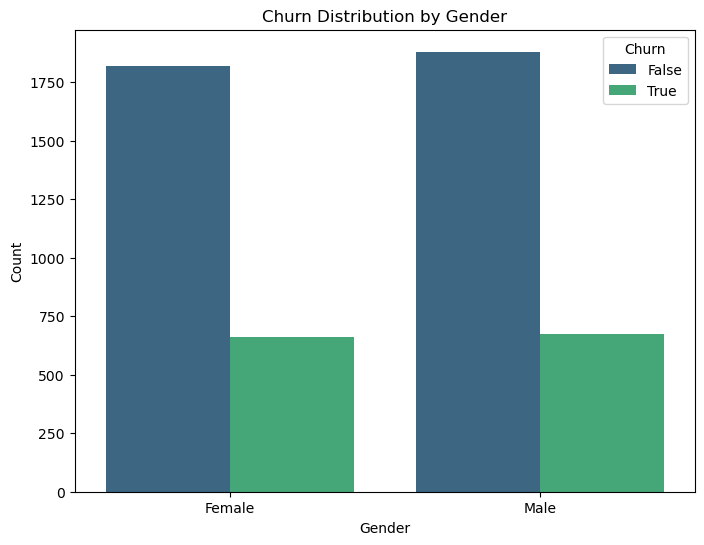

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender')
plt.legend(title='Churn', loc='upper right')
plt.show()

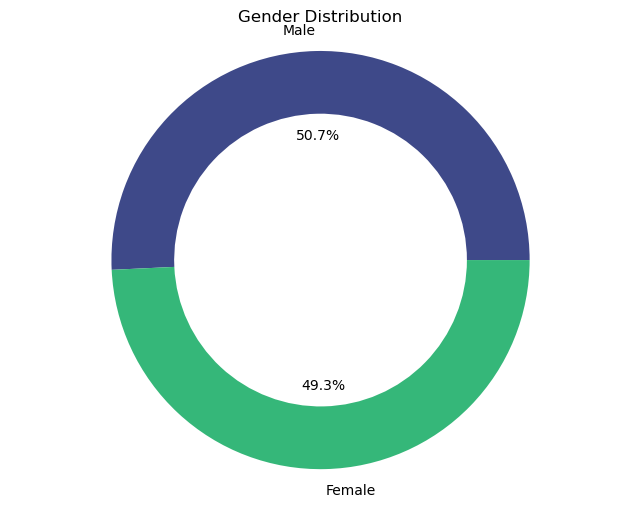

In [47]:
plt.figure(figsize=(8, 6))
sizes = train_df['gender'].value_counts(normalize=True)
colors = ["#3E4989", "#35B779"] 

plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3))
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Male customers have a higher churn rate compared to their female counterparts.

## 4. Churn Distribution by Partner

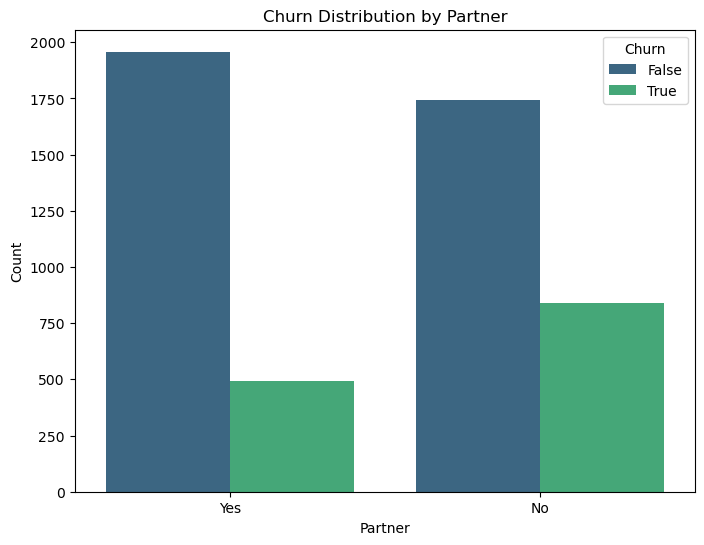

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Churn Distribution by Partner')
plt.legend(title='Churn', loc='upper right')
plt.show()

Customers with a partner churn less than customers with no partner.

## 5. Churn Distribution by Tenure

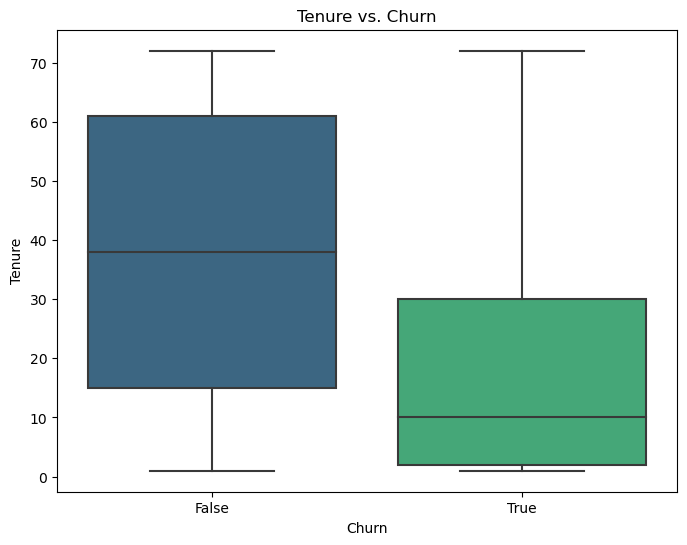

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=train_df, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure vs. Churn')
plt.show()

Customers with lower tenure have a higher churn rate, while those with higher tenure are less likely to churn. There is an inverse relationship between tenure and churn rate.

## 6. Demographic Information Vs. Churn

In [50]:
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)

    # loop through each column name to create a subplot
    for column, ax in zip(columns_to_plot, axes.flatten()):
        # calculate the percentage of observations of the response variable for each group of the independent variable
        prop_by_independent = pd.crosstab(train_df[column], train_df['Churn']).apply(lambda x: x / x.sum() * 100, axis=1)

        # plot the stacked bar chart using the 'viridis' colors
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=["#3E4989", "#35B779"])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column, fontsize=8, loc='left')
        ax.tick_params(rotation='auto')

        # remove the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

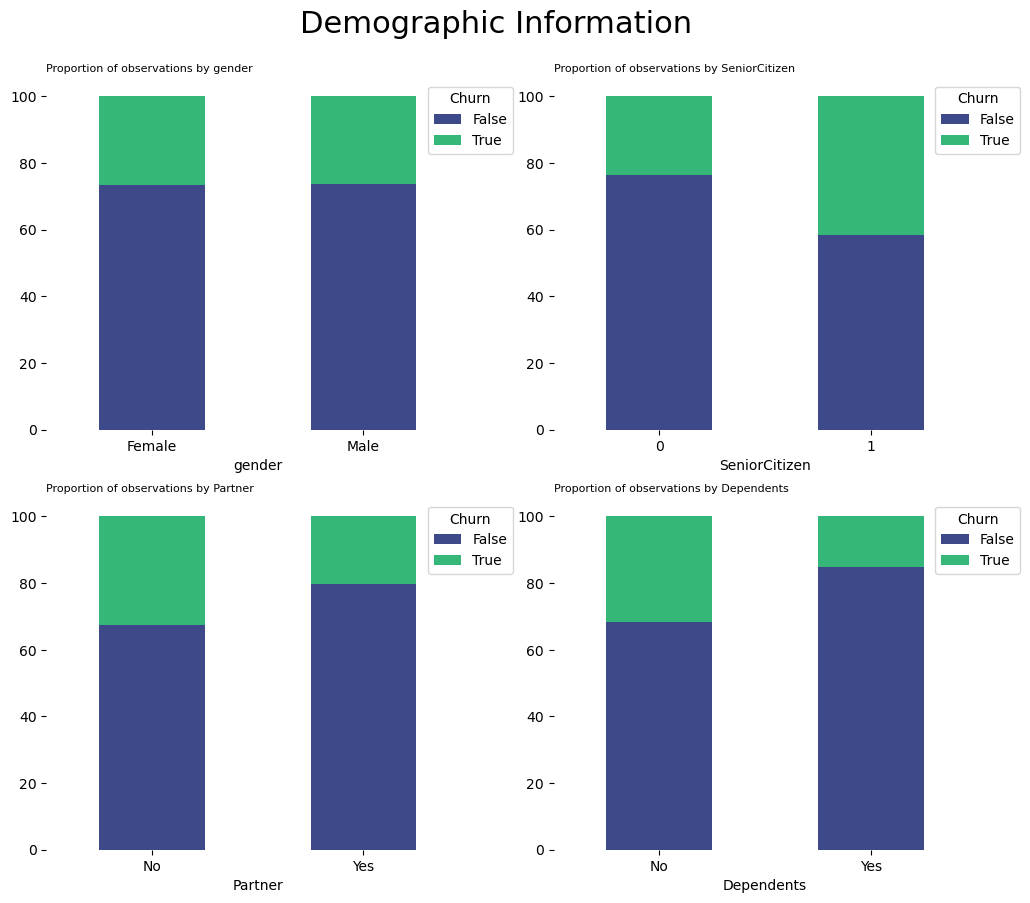

In [51]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

The churn rate of senior citizens is almost double that of young citizens.
Customers with a partner churn less than customers with no partner.

## 7. Customer Account Information Vs. Churn

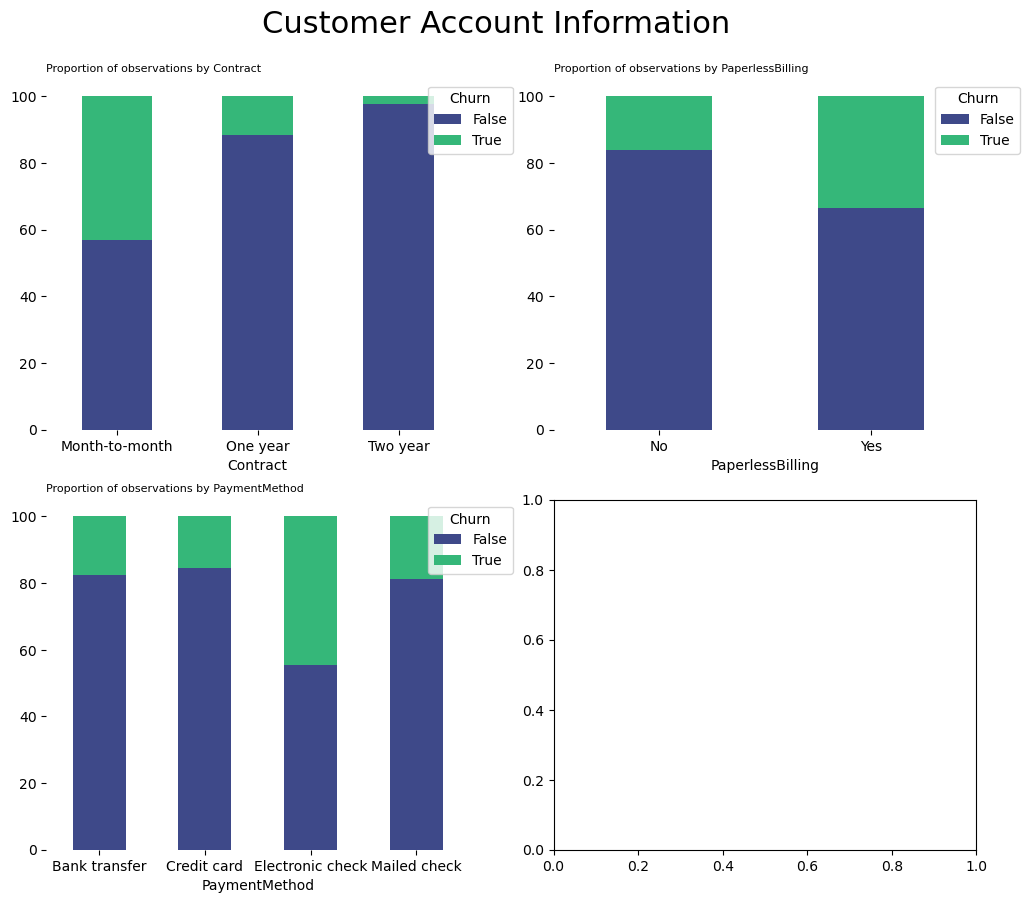

In [52]:
# Evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
Customers who opted for an electronic check as paying method are more likely to leave the company.
Customers subscribed to paperless billing churn more than those who are not subscribed.

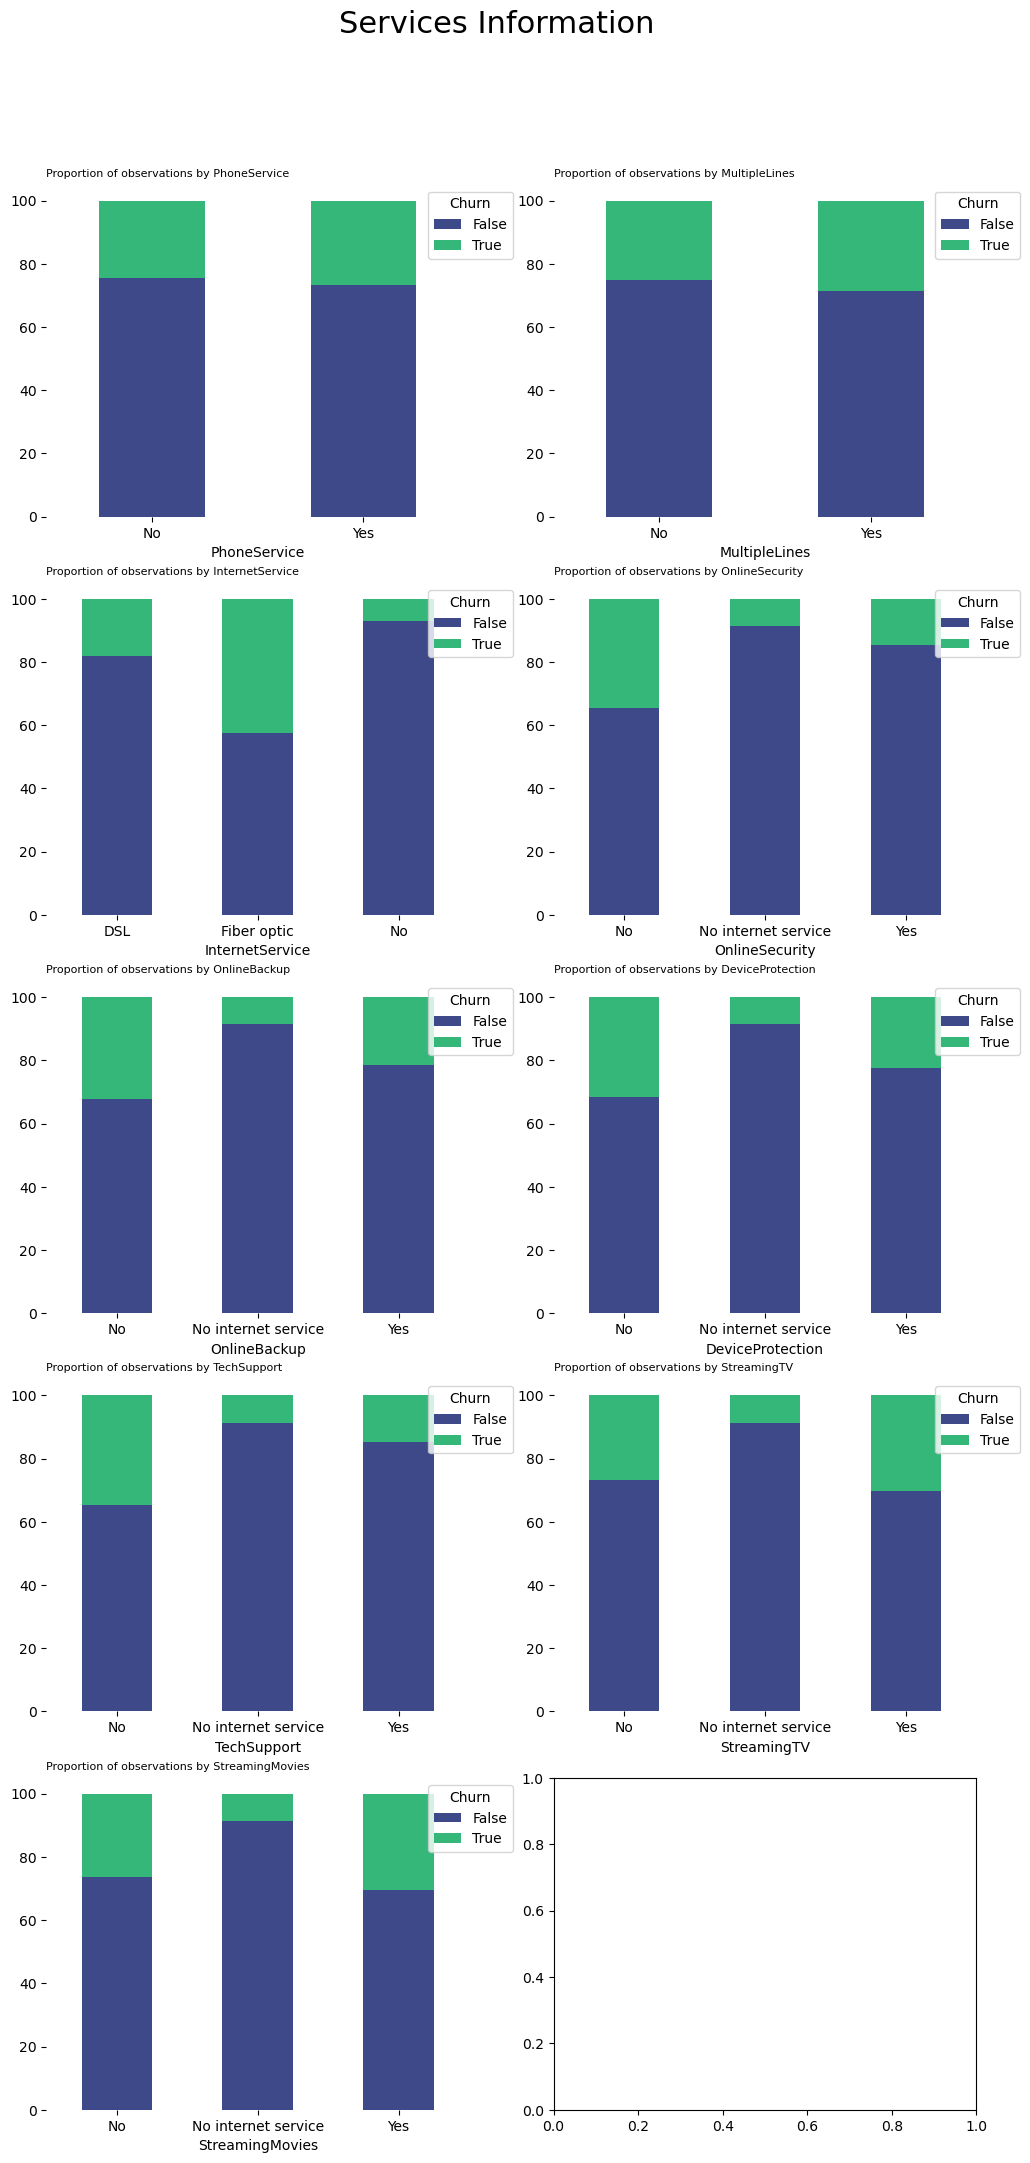

In [53]:
# Plot the percentage of the target for each category of the services columns with stacked bar plots.
# Services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Stacked plot of services columns
percentage_stacked_plot(services_columns,'Services Information')

The phone attributes (PhoneService and MultipleLines) don't have significant predictive power since the percentage of churn for all classes in both independent variables is nearly the same.

Customers who do not have online security, online backup, device protection, tech support, and streaming TV/movies are more likely to churn compared to those who have these services.

## 8. Monthly Charges Vs. Tenure

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

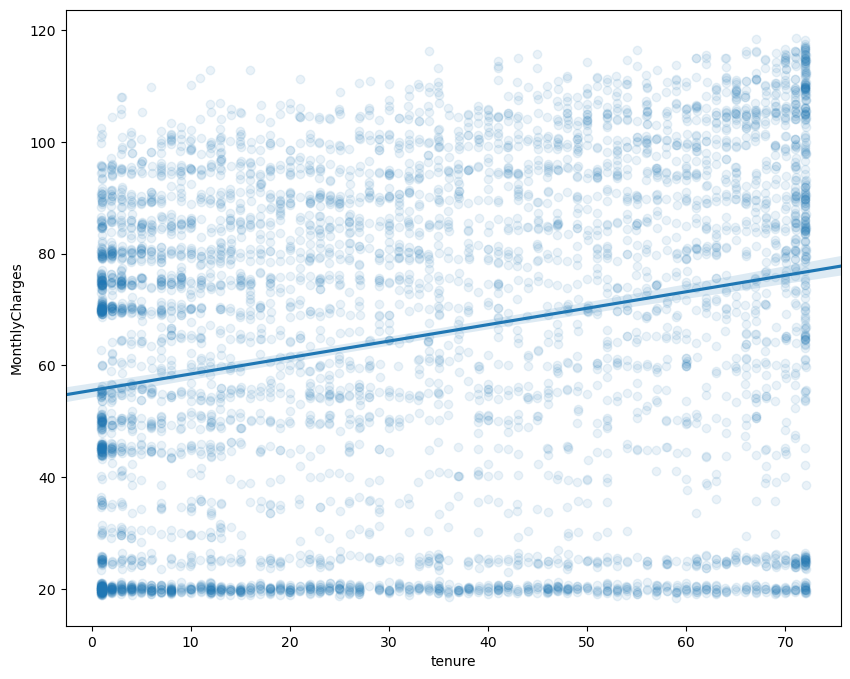

In [91]:
plt.figure(figsize=(10, 8))
sns.regplot(x = "tenure", 
            y = "MonthlyCharges", 
            data = train_df,truncate=False, x_jitter=0.05, scatter_kws={'alpha':0.09})

# Multivariate Analysis

## 1. Tenure vs. Monthly charges vs. Churn

In [75]:
# Calculate the correlation matrix
corr_matrix = train_df.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.003674,0.221585,0.095212,0.149538
tenure,0.003674,1.000000,0.240001,0.826264,-0.352723
MonthlyCharges,0.221585,0.240001,1.000000,0.647007,0.201767
TotalCharges,0.095212,0.826264,0.647007,1.000000,-0.194798
Churn,0.149538,-0.352723,0.201767,-0.194798,1.000000


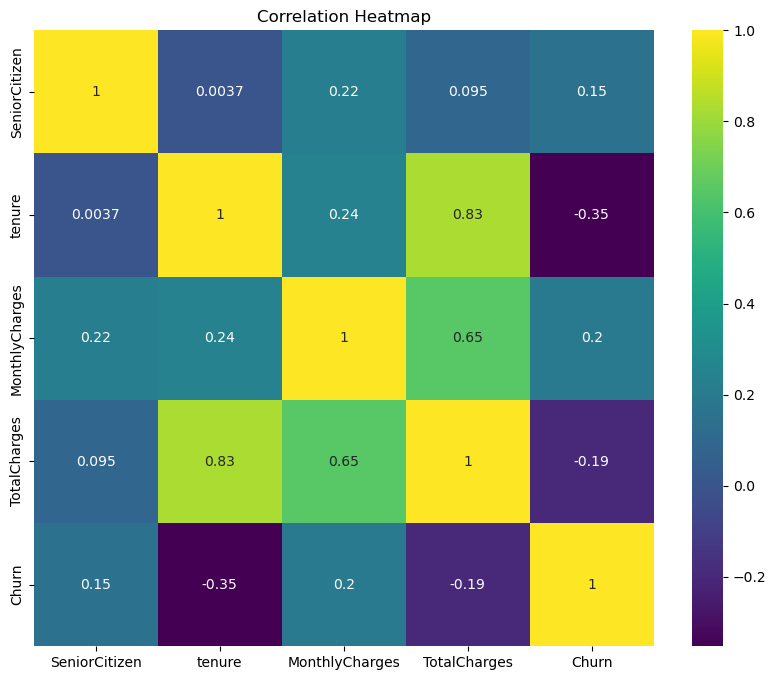

In [90]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation matrix provided:

SeniorCitizen and MonthlyCharges have a positive correlation of approximately 0.22. This suggests that there is a weak positive relationship between being a senior citizen and higher monthly charges.

Tenure and MonthlyCharges have a positive correlation of approximately 0.24. This indicates that there is a weak positive relationship between longer tenure and higher monthly charges.

MonthlyCharges and TotalCharges have a positive correlation of approximately 0.65. This implies that there is a moderate positive relationship between higher monthly charges and higher total charges.

Tenure and TotalCharges have a strong positive correlation of approximately 0.83. This indicates that there is a strong positive relationship between longer tenure and higher total charges.

Churn and MonthlyCharges have a positive correlation of approximately 0.20. This suggests that there is a weak positive relationship between higher monthly charges and the likelihood of churn.

Churn and Tenure have a negative correlation of approximately -0.35. This indicates that there is a moderate negative relationship between longer tenure and the likelihood of churn.

Churn and TotalCharges have a negative correlation of approximately -0.19. This implies that there is a weak negative relationship between higher total charges and the likelihood of churn.

## 2. Relationship between Monthly Charges, Internet Service, and Churn

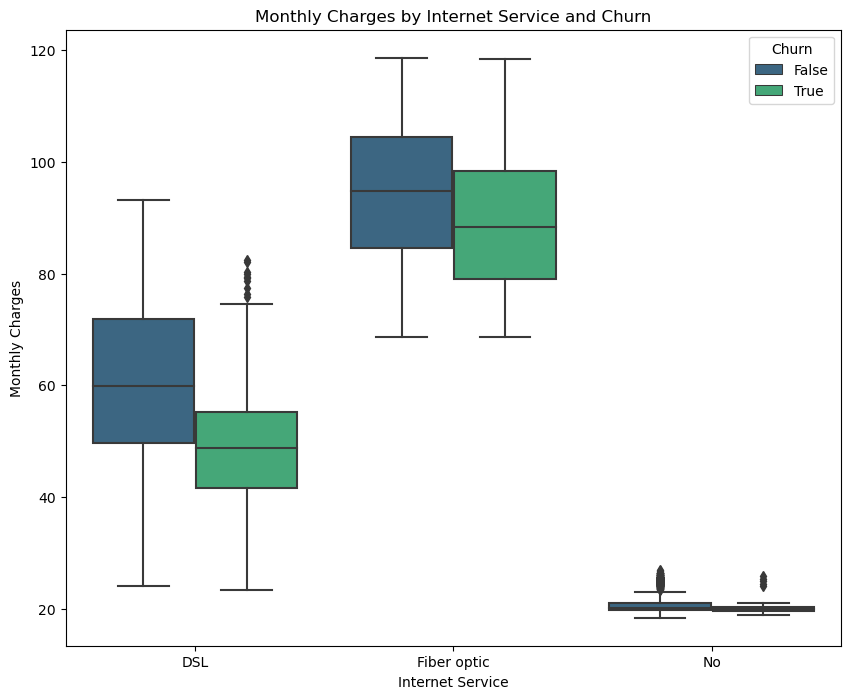

In [88]:
# Create box plots for numerical features by churn
plt.figure(figsize=(10, 8))
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Internet Service and Churn')
plt.show()

From the plot, it can be observed that customers using fiber optic internet service generally have higher monthly charges compared to those using DSL. Additionally, the boxplot highlights that churned customers, irrespective of the internet service type, tend to have higher monthly charges compared to non-churned customers. This suggests that customers with higher monthly charges may be more likely to churn, and this relationship may be more pronounced for fiber optic users.

## 3. Churn Rate by Internet Service and Online Security

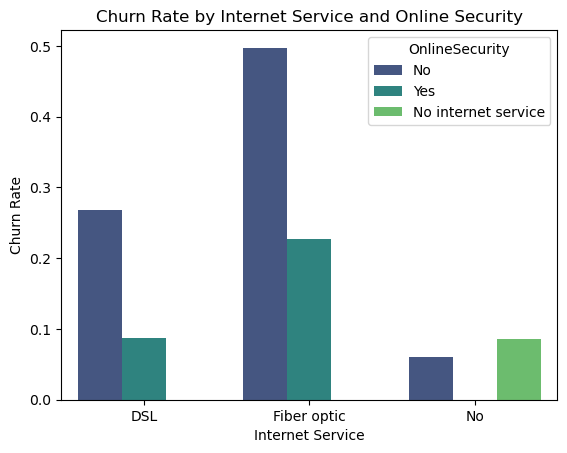

In [92]:
# Create stacked bar chart for Churn Rate by Internet Service and Online Security
churn_by_security = train_df.groupby(['InternetService', 'OnlineSecurity'])['Churn'].mean().reset_index()
sns.barplot(x='InternetService', y='Churn', hue='OnlineSecurity', data=churn_by_security, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Internet Service and Online Security')
plt.show()

From the chart, we can observe that customers using fiber optic internet service without online security have the highest churn rate, indicating that the absence of online security may contribute to customer dissatisfaction and increased churn. On the other hand, customers using DSL internet service with online security have the lowest churn rate, suggesting that the presence of online security may help retain customers.

## 4. Churn Rate by Contract Type and Payment Method

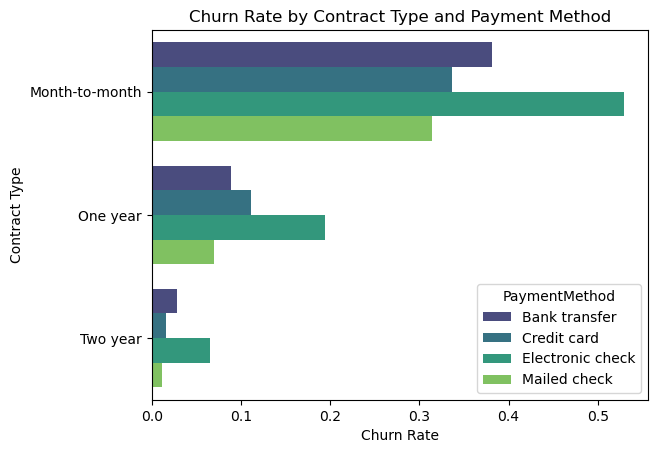

In [97]:
churn_by_contract_payment = train_df.groupby(['Contract', 'PaymentMethod'])['Churn'].mean().reset_index()
sns.barplot(x='Churn', y='Contract', hue='PaymentMethod', data=churn_by_contract_payment, palette='viridis', orient='h')
plt.xlabel('Churn Rate')
plt.ylabel('Contract Type')
plt.title('Churn Rate by Contract Type and Payment Method')
plt.show()

The horizontal bar plot reveals that customers with month-to-month contracts have the highest churn rate, indicating a higher likelihood of churn compared to customers with one-year or two-year contracts. Furthermore, the plot displays variations in churn rates based on different payment methods within each contract type. This information can guide targeted retention strategies by identifying specific contract and payment combinations associated with higher churn rates. By analyzing these patterns, businesses can improve customer experiences, offer incentives, and implement strategies to reduce churn rates and enhance customer retention. The horizontal bar plot provides a clear and concise visual representation of the relationship between contract type, payment method, and churn rate, enabling informed decision-making.

## 5. Scatter Plot Matrix: Relationships among Multiple Numerical Features

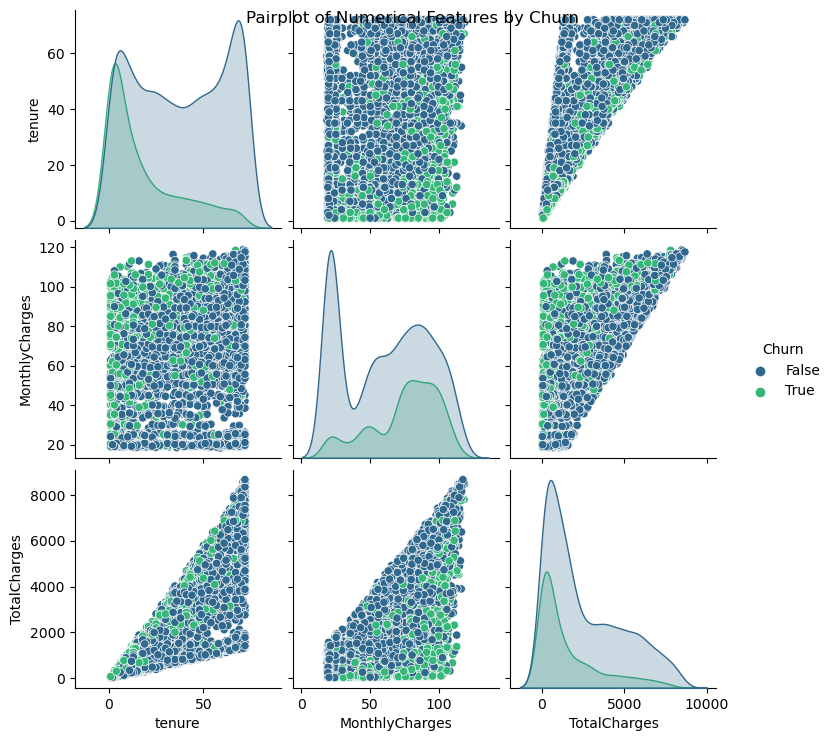

In [100]:
# Select numerical features for multivariate analysis
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a pairplot to visualize relationships between numerical features by churn
sns.pairplot(train_df, vars=numerical_features, hue='Churn', palette='viridis')
plt.suptitle('Pairplot of Numerical Features by Churn')
plt.show()

The scatter plot matrix analysis provides a comprehensive overview of the relationships between multiple numerical features (tenure, MonthlyCharges, and TotalCharges) and their association with churn. 

The analysis reveals the following:

Customers with shorter tenure and lower monthly charges are more likely to churn, indicating the need for strategies to engage and retain these customers. 

There is a positive correlation between tenure and total charges, indicating that as customers stay longer, their total charges tend to increase, and higher total charges are associated with lower churn rates. 

Similarly, higher monthly charges are linked to higher total charges and lower churn rates. These findings suggest that retaining customers with longer tenure, higher monthly charges, and higher total charges should be a priority.

# Answering Questions and Hypothesis

### 1. Is there a relationship between the monthly charges and the likelihood of churn?

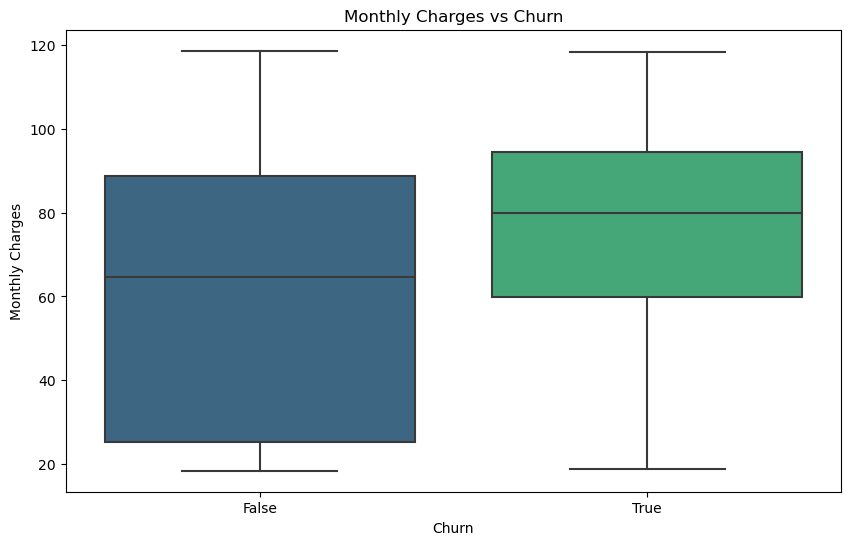

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_df, palette='viridis')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

The boxplot visualization allows us to compare the distribution of monthly charges between customers who churned and those who didn't. It shows that customers who churn tend to have slightly higher monthly charges compared to those who do not churn.

### 2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?

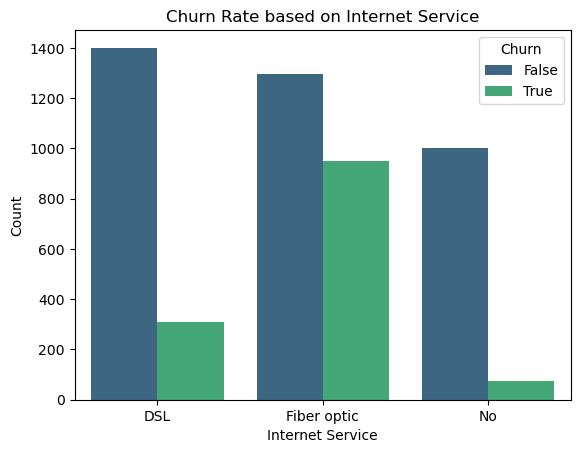

In [57]:
sns.countplot(x='InternetService', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Rate based on Internet Service')
plt.show()

Among customers with internet service, those with fiber optic tend to have a higher churn rate compared to those with DSL.

### 3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?

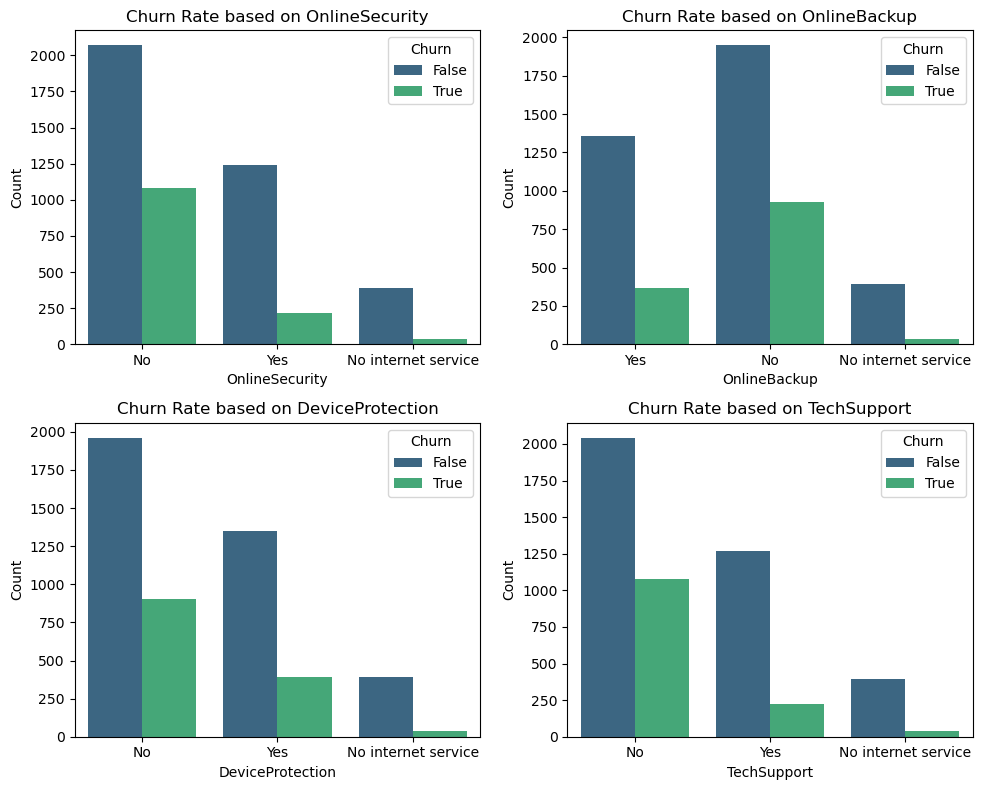

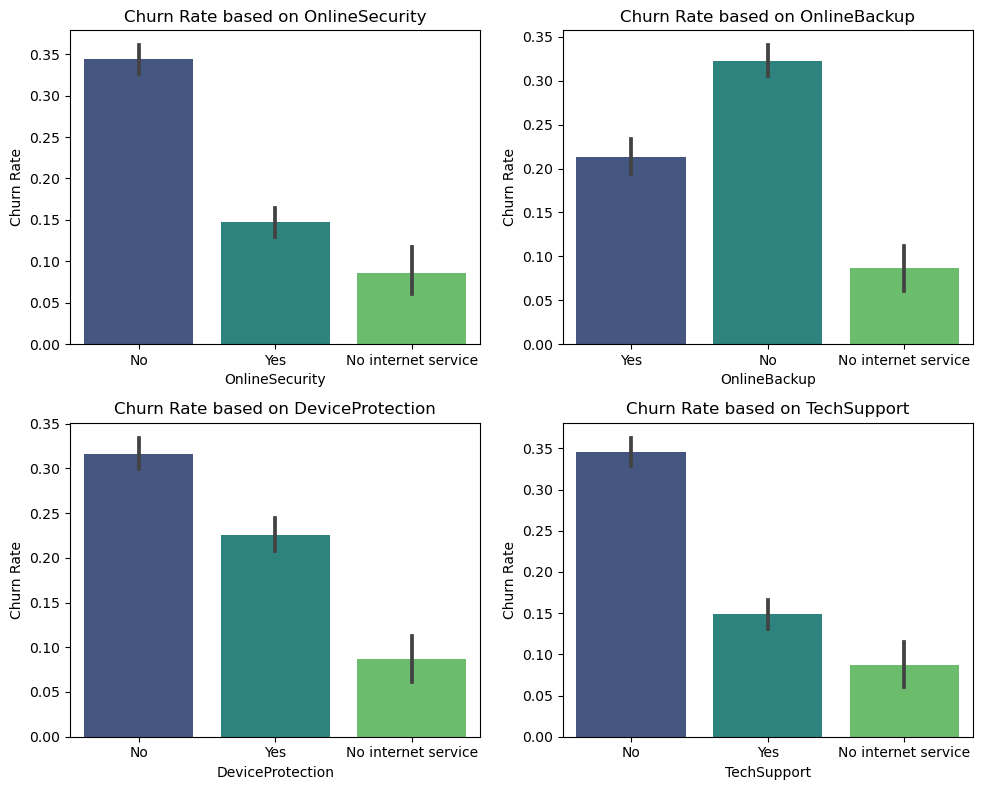

In [58]:
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for ax, service in zip(axes.flatten(), services):
    sns.countplot(x=service, hue='Churn', data=train_df, ax=ax, palette='viridis')
    ax.set_xlabel(service)
    ax.set_ylabel('Count')
    ax.set_title(f'Churn Rate based on {service}')

plt.tight_layout()
plt.show()

services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for ax, service in zip(axes.flatten(), services):
    sns.barplot(x=service, y='Churn', data=train_df, ax=ax, palette='viridis')
    ax.set_xlabel(service)
    ax.set_ylabel('Churn Rate')
    ax.set_title(f'Churn Rate based on {service}')

plt.tight_layout()
plt.show()


Customers who do not have online security, online backup, device protection, or tech support tend to have higher churn rates compared to those who have these services.

### 4 How does the churn rate vary based on the customers' gender

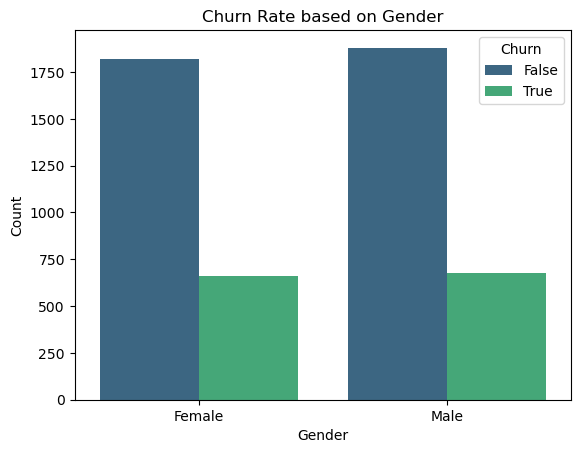

In [59]:
sns.countplot(x='gender', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate based on Gender')
plt.show()

There is no significant difference in churn rates between male and female customers.

### 5. Does the presence of a partner influence the likelihood of churn?


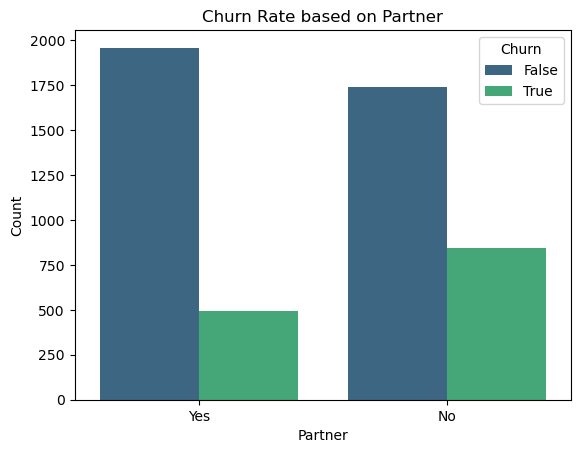

In [60]:
sns.countplot(x='Partner', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Churn Rate based on Partner')
plt.show()

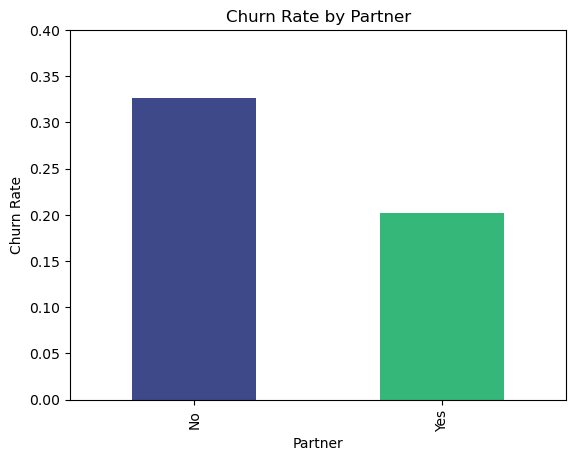

In [64]:
partner_churn_rate = train_df.groupby('Partner')['Churn'].sum() / train_df.groupby('Partner')['Churn'].count()
partner_churn_rate.plot(kind='bar', color=["#3E4989", "#35B779"])
plt.title('Churn Rate by Partner')
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.ylim(0, 0.4)
plt.show()

Customers who do not have a partner tend to have a slightly higher churn rate compared to those who have a partner.

### 6. Is there a correlation between the tenure of customers and their churn rate?

In [76]:
correlation = train_df['tenure'].corr(train_df['Churn'])
print("Correlation between tenure and churn:", correlation)

Correlation between tenure and churn: -0.35272313575969044


The correlation coefficient between "tenure" and "Churn" is approximately -0.3527.
The negative value suggests a weak negative correlation between these two variables. 
As the tenure increases, there is a slight tendency for the churn rate to decrease slightly.

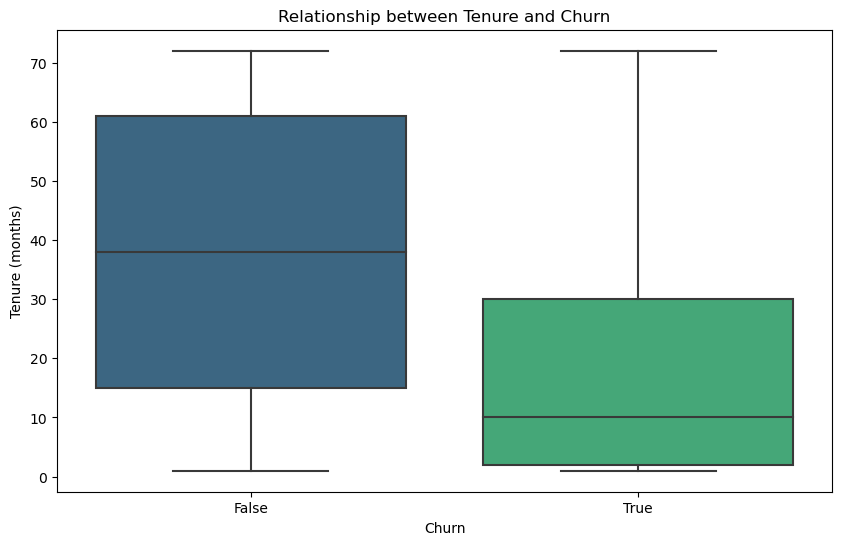

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=train_df, palette='viridis')
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

The boxplot shows that customers who churn tend to have lower tenure (fewer months of subscription) compared to those who do not churn.

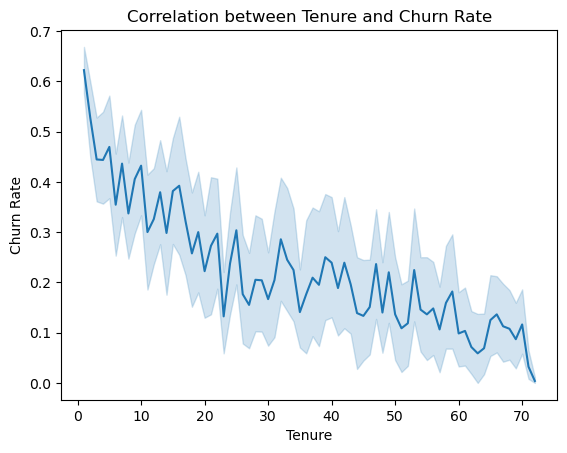

In [62]:
sns.lineplot(x='tenure', y='Churn', data=train_df, estimator='mean', palette='viridis')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Correlation between Tenure and Churn Rate')
plt.show()

The line plot illustrates the correlation between the tenure of customers and their churn rate. The x-axis represents the tenure (number of months the customer has subscribed) and the y-axis represents the churn rate.

The plot shows that there is a noticeable trend in the churn rate based on the tenure of customers. Initially, the churn rate is relatively high for customers with low tenure, indicating that new customers are more likely to churn. However, as the tenure increases, the churn rate gradually decreases, suggesting that customers who have been with the company for a longer period are less likely to churn.

This trend indicates that customer loyalty tends to increase with longer tenure, as established customers are more likely to continue their subscription. The plot suggests that tenure is a relevant factor in understanding and predicting churn behavior.